# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


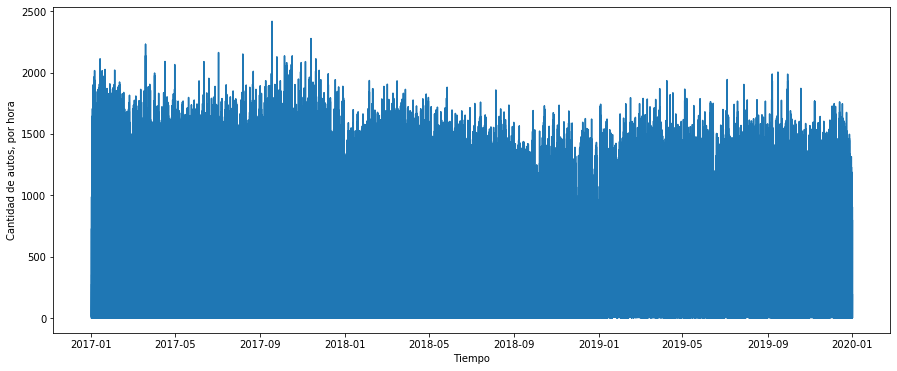

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


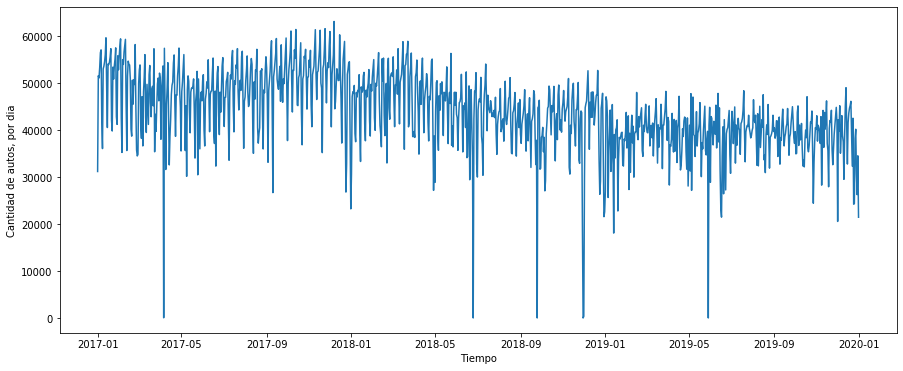

In [16]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [17]:
# Para evitar reprocesar la primer parte, se exporta como csv el dataset obtenido
dataset.to_csv('dataset.csv')

## 1. Análisis exploratorio de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
# Importo el dataset obtenido originalmente
dataset = pd.read_csv('dataset.csv', sep =',')


# Convierto nuevamente la columna fecha en formato dt
dataset['fecha2'] = pd.to_datetime(dataset.fecha)
dataset.drop(columns = ["Unnamed: 0",'fecha'], inplace = True)
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.rename(columns = {'dia':'dia_sem'}, inplace = True)

# Modifico los valores de los días de la semana, para que al graficar se pueda visualizar de Lunes a Domingo
dataset = dataset.replace("Lunes"    , "1 Lunes"    )
dataset = dataset.replace("Martes"   , "2 Martes"   )
dataset = dataset.replace("Miércoles", "3 Miercoles")
dataset = dataset.replace("Jueves"   , "4 Jueves"   )
dataset = dataset.replace("Viernes"  , "5 Viernes"  )
dataset = dataset.replace("Sábado"   , "6 Sabado"   )
dataset = dataset.replace("Domingo"  , "7 Domingo"  )

# Agrego columnas de trabajo 
dataset["año"]       = dataset["fecha"].dt.year
dataset["trimestre"] = dataset["fecha"].dt.quarter
dataset["mes"]       = dataset["fecha"].dt.month
dataset["dia"]       = dataset["fecha"].dt.day
dataset["hora"]      = dataset["fecha"].dt.hour
dataset

,dia_sem,sentido,tipo_vehiculo,cantidad_pasos,fecha,año,trimestre,mes,dia,hora
0,7 Domingo,Provincia,Pesado,1,2017-01-01 00:00:00,2017,1,1,1,0
1,7 Domingo,Provincia,Liviano,9,2017-01-01 00:00:00,2017,1,1,1,0
2,7 Domingo,Provincia,Liviano,644,2017-01-01 00:00:00,2017,1,1,1,0
3,7 Domingo,Provincia,Pesado,6,2017-01-01 00:00:00,2017,1,1,1,0
4,7 Domingo,Provincia,Pesado,1,2017-01-01 00:00:00,2017,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
238864,2 Martes,Provincia,Liviano,556,2019-12-31 22:00:00,2019,4,12,31,22
238865,2 Martes,Provincia,Pesado,1,2019-12-31 22:00:00,2019,4,12,31,22
238866,2 Martes,Centro,Liviano,580,2019-12-31 22:00:00,2019,4,12,31,22
238867,2 Martes,Centro,Liviano,214,2019-12-31 23:00:00,2019,4,12,31,23


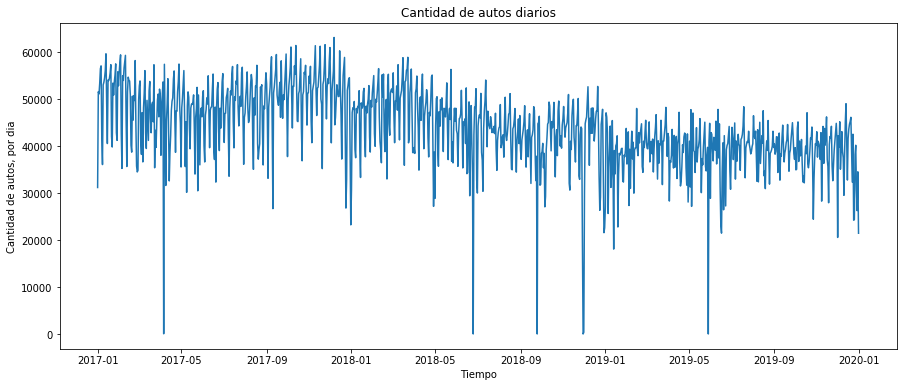

In [3]:
# Como primer paso, se retoma el gráfico diario realizado para analizar la presencia de outliers

diario = dataset.resample('D', on = 'fecha').sum()

diario.drop(columns=['año','trimestre','mes','dia','hora'], inplace = True)

plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de autos diarios")
plt.show()

In [4]:
# Se observan unos días de baja circulación. Para identificarlos, se tomarán los días con circulación menor a 10.000 vehiculos 

outliers = diario[diario.cantidad_pasos < 10000]
outliers

,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-30,0
2018-12-01,350
2019-05-29,0


Los dias detectados como outliers de manera gráfica se pueden explicar debido a lo siguiente:

- 2017-04-06: Paro general (https://www.infobae.com/politica/2017/03/16/la-cgt-define-la-fecha-del-paro-nacional/)
- 2018-06-25: Paro general (https://www.infobae.com/politica/2018/06/12/la-cgt-anuncio-un-paro-general-para-el-25-de-junio/)
- 2018-09-25: Paro general (https://www.infobae.com/politica/2018/08/29/la-cgt-anuncio-un-paro-general-para-el-25-de-septiembre/)
- 2018-11-30: Cumbre G20 (https://www.infobae.com/politica/2018/10/30/el-gobierno-decreto-feriado-el-30-de-noviembre-en-la-ciudad-de-buenos-aires-por-la-cumbre-del-g20/)
- 2018-12-01: Cumbre G20
- 2019-05-29: Paro general (https://www.infobae.com/politica/2019/05/14/la-cgt-convoco-a-un-paro-general-de-24-horas-para-el-29-de-mayo/)

Como fueron hechos concretos que causaron estas anomalias, es decir, se descarta un error de medición, no se modificaran los valores

In [5]:
# Como segundo paso, nos aseguraremos de que el dataset no contenga valores faltantes

print("Cantidad de datos faltantes por columna: \n")
print(dataset.isna().sum())

Cantidad de datos faltantes por columna: 

dia_sem           0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
año               0
trimestre         0
mes               0
dia               0
hora              0
dtype: int64


In [6]:
# Trataremos de observar el comportamiento resampleando el dataset de manera semanal, con una ventana de 4 semanas (1 mes aproximadamente)

semanal = dataset.resample('W', on = 'fecha').sum()

semanal.drop(columns = ["año","trimestre", "mes", "dia", "hora"], inplace = True)

semanal_promedio_tendencia = semanal.cantidad_pasos.rolling(window = 4, center = True).mean()
semanal_promedio_tendencia

fecha
2017-01-01          NaN
2017-01-08          NaN
2017-01-15    275505.75
2017-01-22    356355.25
2017-01-29    359402.50
                ...    
2019-12-08    271726.50
2019-12-15    278821.75
2019-12-22    268780.50
2019-12-29    212050.25
2020-01-05          NaN
Freq: W-SUN, Name: cantidad_pasos, Length: 158, dtype: float64

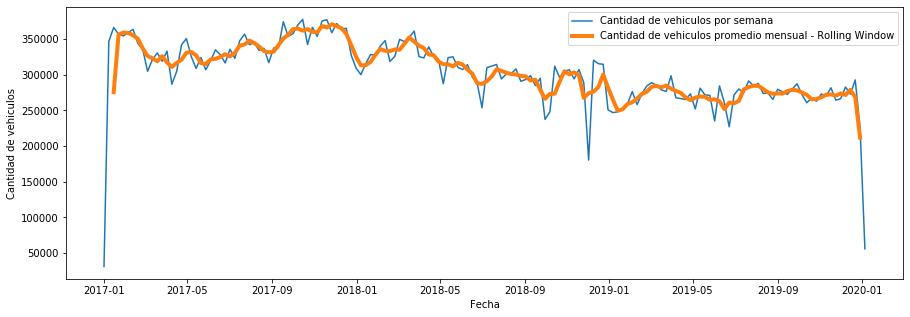

In [7]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Cantidad de vehiculos por semana')
plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Cantidad de vehiculos promedio mensual - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de vehiculos')
plt.legend()
plt.show()

En este caso observamos una tendencia negativa, es decir, cada vez se utiliza menos el pago en efectivo en el peaje de Autopista Illia.
Es importante que no consideremos ni la primer semana ni la última, ya que se debe tratar de semanas con menos de 7 días de datos.

Text(0.5, 1.0, 'Cantidad de vehiculos por mes y año')

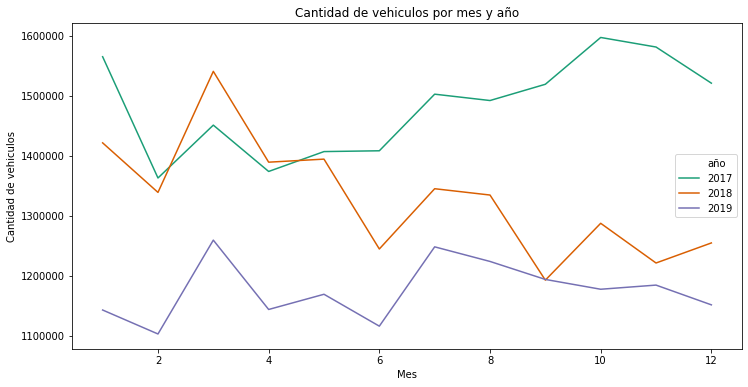

In [8]:
# A partir de aqui, trataremos de entender mejor las tendencias que presentan los datos, iniciando con un gráfico mensual de la cantidad de pasos

mensual = dataset.groupby(["año","mes"])[("cantidad_pasos")].sum().reset_index(name="cantidad_pasos")

plt.figure(figsize = (12,6))

sns.lineplot(data = mensual, x = "mes", y = "cantidad_pasos", hue = "año", palette = "Dark2")
plt.xlabel("Mes")
plt.ylabel("Cantidad de vehiculos")
plt.title("Cantidad de vehiculos por mes y año")

Se observa que con el pasar de los años, cada vez es menor la cantidad de vehiculos que utilizan el peaje.
A simple vista no se pueden obtener conclusiones, salvo que desde Marzo de cada año, hay tendencia positiva en 2017, negativa en 2018 y cierta estabilidad en 2020.

Una de las causas que puede explicar esta caida desde 2018 es el inicio de la devaluación del dolar en inicios de mayo, lo que impacto en los valores del combustible y la necesidad de la población de buscar alternativas de ahorro.

Text(0.5, 1.0, 'Cantidad de vehiculos por dia de la semana')

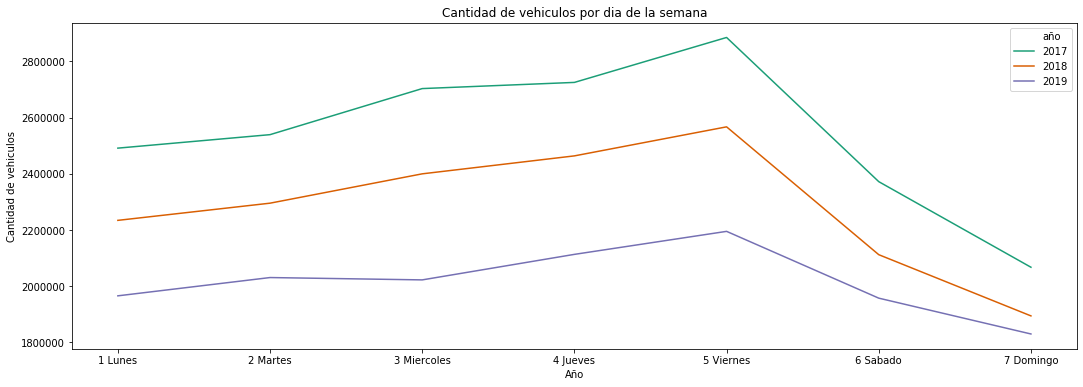

In [9]:
# ¿Se tiene el mismo comportamiento de acuerdo al día de la semana a través de los años?

dia_sem = dataset.groupby(["año","dia_sem"])[("cantidad_pasos")].sum().reset_index(name="cantidad_pasos")

plt.figure(figsize = (18,6))

sns.lineplot(data = dia_sem, x = "dia_sem", y = "cantidad_pasos", hue = "año", palette = "Dark2")
plt.xlabel("Año")
plt.ylabel("Cantidad de vehiculos")
plt.title("Cantidad de vehiculos por dia de la semana")

En este caso si se ve un comportamiento similar en todos los años. Desde Lunes hasta el Viernes, el flujo de vehiculos aumenta, y el fin de semana cae considerablemente 

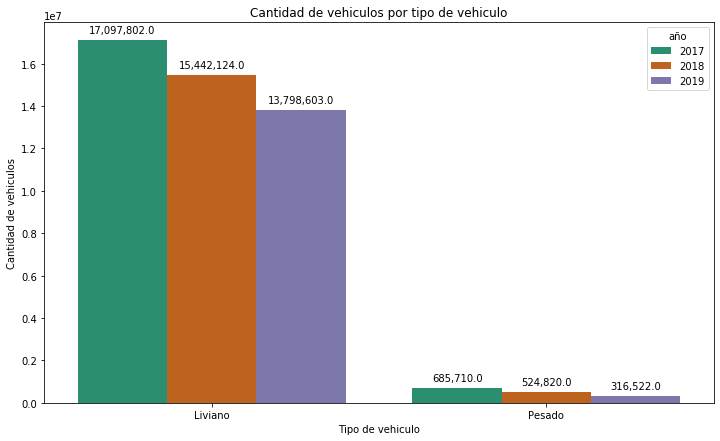

In [10]:
# ¿Cómo varió el flujo por tipo de vehiculo a través de los años?

sentido_tipo = dataset.groupby(["año","tipo_vehiculo"])[("cantidad_pasos")].sum().reset_index(name="cantidad_pasos")

plt.figure(figsize = (12,7))

barplt = sns.barplot(data = sentido_tipo, x = "tipo_vehiculo", y = "cantidad_pasos", hue = "año", palette = "Dark2")
plt.xlabel("Tipo de vehiculo")
plt.ylabel("Cantidad de vehiculos")
plt.title("Cantidad de vehiculos por tipo de vehiculo")

# Poner etiquetas dentro del gráfico
coment=barplt.patches
for coment in coment :
    y_value = coment.get_height()
    x_value = coment.get_x() + coment.get_width()/2
    space = 5
    va = 'bottom'
    label = "{:,}".format(y_value)
    # Crear la anotación
    plt.annotate(
     label,
     (x_value, y_value),
     xytext=(0, space),
     textcoords="offset points",
     ha='center',
     va=va)
plt.show()

La información que se puede extraer del gráfico de arriba es que, por un lado, los vehiculos livianos superan ampliamente a los vehiculos pesados, mientras que por otro lado, en ambos casos disminuyó el flujo con el paso del tiempo.

Text(0.5, 1.0, 'Cantidad de vehiculos por horario y sentido de circulación')

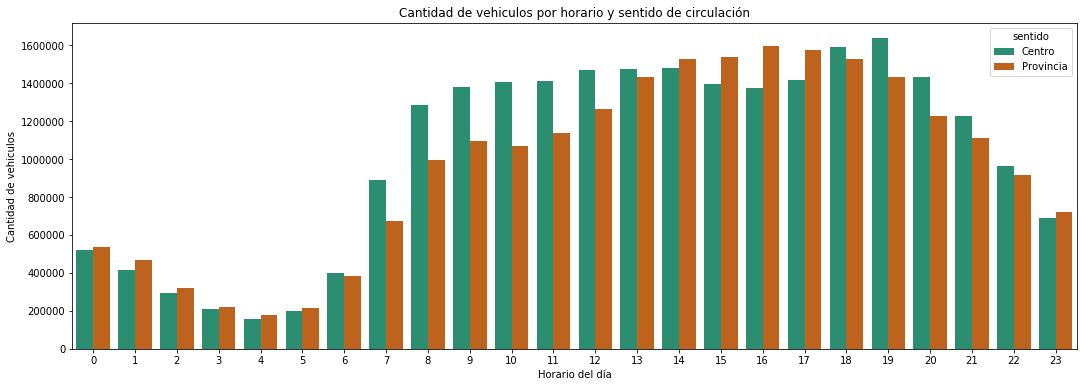

In [11]:
# ¿Cómo es el flujo de vehiculos en cada sentido de acuerdo al horario?

horario_sent = dataset.groupby(["hora","sentido"])[("cantidad_pasos")].sum().reset_index(name="cantidad_pasos")

plt.figure(figsize = (18,6))

sns.barplot(data = horario_sent, x = "hora", y = "cantidad_pasos", hue = "sentido", palette = "Dark2")
plt.xlabel("Horario del día")
plt.ylabel("Cantidad de vehiculos")
plt.title("Cantidad de vehiculos por horario y sentido de circulación")

En este caso se puede observar varios comportamientos esperable:
- En las primeras horas del día (hasta las 6 aproximadamente) el flujo es bajo
- A partir de las 7 empieza a haber mas movimiento, principalmente hacia Capital, lo que se puede deber a gente yendo a trabajar o estudiar
- Desde las 14, el flujo se invierte, siendo la mayor parte hacia Provincia, lo que puede deberse a gente volviendo de trabajar o estudiar

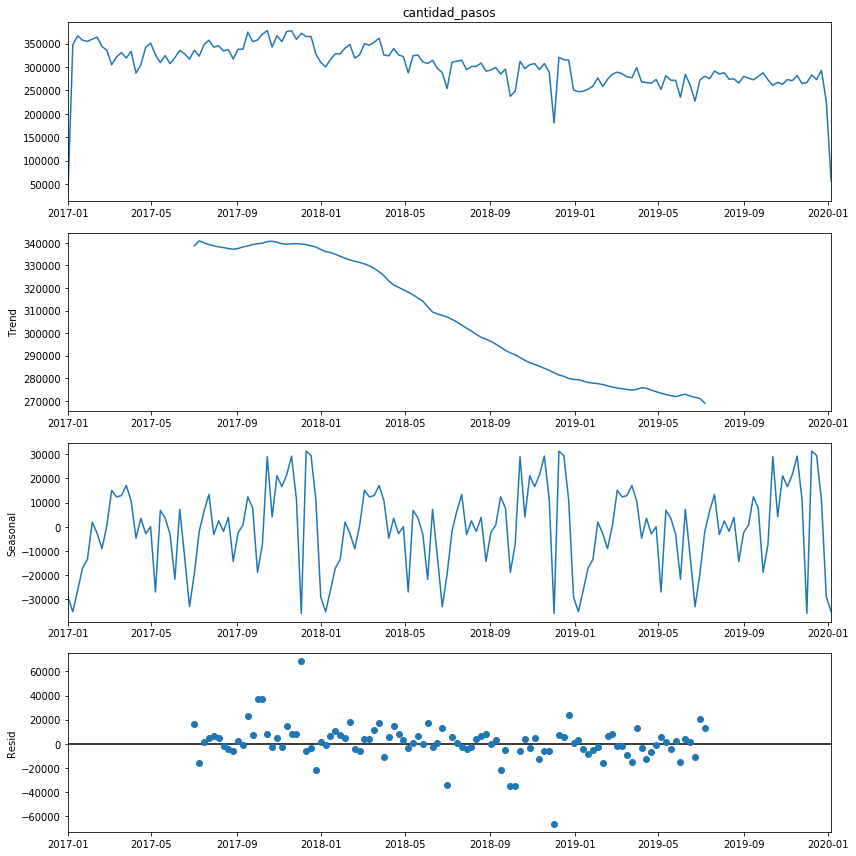

In [12]:
# Descomposición del dataset

from statsmodels.tsa.seasonal import seasonal_decompose

semanal = dataset.resample('W', on = 'fecha').sum()
semanal.drop(columns = ["año","trimestre", "mes", "dia", "hora"], inplace = True)

result = seasonal_decompose(semanal.cantidad_pasos, model='additive')

import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

En la descomposición del dataset observamos:

- Tendencia: claramente negativa, algo ya mencionado anteriormente
- Estacionalidad: no resulta tan claro como el gráfico anterior, pero si se observan algunos patrones como que las primeras semanas del año son bajas (efecto vacaciones)
- Ruido: se observa un punto bastante por debajo que el resto, que se estima que coincide con el G20 (analizado previamente). Por otro lado, el punto que esta por encima de los otros (fines de 2017) se puede deber a gente que regresa a sus ciudades previo a las fiestas, o que sale de vacaciones de manera anticipada. 

## 2. Modelo de Machine Learning

Para realizar el modelo, se procederá a resamplear el dataset por fecha, eliminando las columnas utilizadas en el Análisis Exploratorio de Datos



In [13]:
diario = dataset.resample('D', on = 'fecha').sum()
diario.drop(columns = ["año","trimestre", "mes", "dia", "hora"], inplace = True)

diario

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


In [14]:
# Como modelo de benchmark, se usará una Regresión Lineal

diario['fecha_numeros'] = diario.index.map(datetime.datetime.toordinal)

split_date = '2019-09-30'

train = diario.loc[diario.index <= split_date].copy()
test  = diario.loc[diario.index >  split_date].copy()

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train.fecha_numeros.values.reshape(-1, 1), train.cantidad_pasos)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

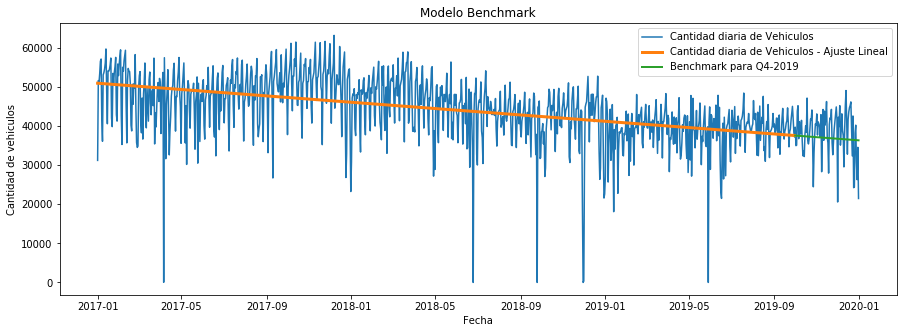

In [15]:
# Graficamos los datos originales, la regresión lineal y la predicción para el período

plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad diaria de Vehiculos')
plt.plot(train.index, lr.predict(train.fecha_numeros.values.reshape(-1, 1)), lw = 3, label = 'Cantidad diaria de Vehiculos - Ajuste Lineal')
plt.plot(test.index,  lr.predict(test.fecha_numeros.values.reshape(-1, 1)),  lw = 2, label = 'Benchmark para Q4-2019')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de vehiculos')
plt.legend()
plt.title("Modelo Benchmark")
plt.show()

Para evaluar los modelos, se selecciona el RMSE por ser un indicador de facil interpretación.

In [16]:
# Calculo de error del Benchmark

from sklearn.metrics import mean_squared_error
rmse_bench = np.sqrt(mean_squared_error(test.cantidad_pasos, lr.predict(test.fecha_numeros.values.reshape(-1, 1))))

print('RMSE modelo Benchmark: %.1f' % rmse_bench)

RMSE modelo Benchmark: 5880.4


Para este proyecto, me interesa utilizar una herramienta propia de las series de tiempo. En este caso seleccione SARIMAX, que no fue utilizada en el curso y que fue investigada por fuera del mismo.

SARIMAX es un modelo utilizado cuando tenemos ciclos estacionales, como los semanales que observamos en el Análisis Exploratorio de Datos (por eso no se uso ARIMA, que era otra opción que fue investigada).

En una primera etapa, se utilizará el valor 1 en todos los coeficientes del modelo solo para probar su performance (excepto el valor S que será igual a 7, ya que se considerará la estacionalidad de una semana). En una segunda etapa, se realizará una optimización de hiperparámetros para obtener el mejor resultado posible.

In [17]:
# Separo los datos en Train y Test

diario['fecha_numeros'] = diario.index.map(datetime.datetime.toordinal)

split_date = '2019-09-30'

train = diario.loc[diario.index <= split_date].copy()
test  = diario.loc[diario.index >  split_date].copy()

train.drop(columns = ["fecha_numeros"], inplace = True)


# Realizo la predicción con el modelo SARIMAX

import statsmodels.api as sm

modelo = sm.tsa.statespace.SARIMAX(train, order = (1,1,1), seasonal_order = (1,1,1,7))

modelo_sarimax = modelo.fit()

prediccion = modelo_sarimax.forecast(steps = 92)
prediccion

2019-10-01    40353.119450
2019-10-02    42687.208412
2019-10-03    43914.284701
2019-10-04    46128.561206
2019-10-05    38659.361113
                  ...     
2019-12-27    48315.584786
2019-12-28    40327.796406
2019-12-29    36234.603898
2019-12-30    42095.316694
2019-12-31    43354.480795
Freq: D, Length: 92, dtype: float64

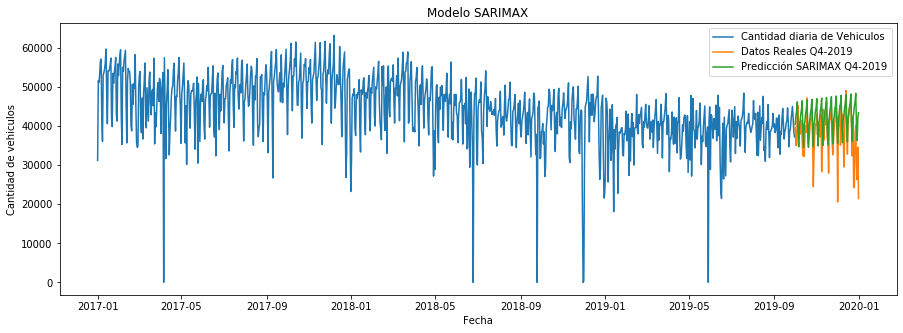

In [18]:
# Grafico de la predicción del modelo SARIMAX

plt.figure(figsize = (15,5))
plt.plot(train.index, train.cantidad_pasos, label = 'Cantidad diaria de Vehiculos')
plt.plot(test.index,  test.cantidad_pasos,  label = 'Datos Reales Q4-2019')
plt.plot(test.index,  prediccion, label = 'Predicción SARIMAX Q4-2019')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de vehiculos')
plt.legend()
plt.title("Modelo SARIMAX")
plt.show()

In [19]:
# Calculo de error de SARIMAX

from sklearn.metrics import mean_squared_error
rmse_SARIMAX = np.sqrt(mean_squared_error(test.cantidad_pasos, prediccion))

print('RMSE modelo SARIMAX: %.1f' % rmse_SARIMAX)

RMSE modelo SARIMAX: 6602.2


El RMSE obtenido en este primer intento es peor al obtenido en el Benchmark. 
Es sumamente necesario optimizar los hiperparámetros para poder obtener una solución mejor, por lo cual se realizará un Grid Search, ya que si bien es costoso computacionalmente, obtendremos la mejor combinación de valores posibles.

In [30]:
# Grid Search del SARIMAX

import time
start = time.time()

import itertools

p = d = q = range(0,3)
pdq = list(itertools.product(p,d,q))

p2 = d2 = q2 = range(0, 3)
pdq2 = list(itertools.product(p2,d2,q2))

s = 7

pdqs2 = [(c[0], c[1], c[2], s) for c in pdq2]

combs = {}
rmse = []


for combination in pdq:
    for seasonal_combination in pdqs2:
        try:
            modelo = sm.tsa.statespace.SARIMAX(train, order=combination, seasonal_order=seasonal_combination)
            modelo_fit = modelo.fit()
            prediccion = modelo_fit.forecast(steps = 92)
            combs.update({np.sqrt(mean_squared_error(test.cantidad_pasos, prediccion)) : [combination, seasonal_combination]})
            rmse.append(np.sqrt(mean_squared_error(test.cantidad_pasos, prediccion)))
            
        except:
            continue
            
end = time.time()
process_time = end - start

C:\Users\Guillermo Mishima\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Guillermo Mishima\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Guillermo Mishima\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Guillermo Mishima\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zer

In [32]:
# Tiempo de procesamiento del Grid Search

print('Tiempo de Procesamiento del Grid Search: %.1f' % process_time)

Tiempo de Procesamiento del Grid Search: 5528.1


In [33]:
# Combinación Óptima de Hiperparámetros

best_rmse = min(rmse)
combs[best_rmse]

[(0, 1, 0), (0, 1, 2, 7)]

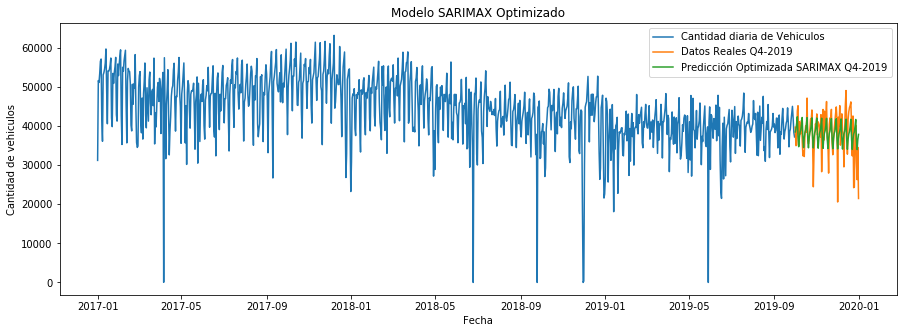

In [34]:
# Ejecución de SARIMAX con los hiperparámetros obtenidos en el Grid Search

diario['fecha_numeros'] = diario.index.map(datetime.datetime.toordinal)

split_date = '2019-09-30'

train = diario.loc[diario.index <= split_date].copy()
test  = diario.loc[diario.index >  split_date].copy()

train.drop(columns = ["fecha_numeros"], inplace = True)


import statsmodels.api as sm

modelo = sm.tsa.statespace.SARIMAX(train, order = (0,1,0), seasonal_order = (0,1,2,7))

modelo_sarimax = modelo.fit()

prediccion = modelo_sarimax.forecast(steps = 92)
prediccion

plt.figure(figsize = (15,5))
plt.plot(train.index, train.cantidad_pasos, label = 'Cantidad diaria de Vehiculos')
plt.plot(test.index,  test.cantidad_pasos,  label = 'Datos Reales Q4-2019')
plt.plot(test.index,  prediccion, label = 'Predicción Optimizada SARIMAX Q4-2019')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de vehiculos')
plt.legend()
plt.title("Modelo SARIMAX Optimizado")
plt.show()

In [35]:
# Calculo de error de SARIMAX Optimizado

from sklearn.metrics import mean_squared_error
rmse_SARIMAX = np.sqrt(mean_squared_error(test.cantidad_pasos, prediccion))

print('RMSE modelo SARIMAX Optimizado: %.1f' % rmse_SARIMAX)

RMSE modelo SARIMAX Optimizado: 5137.7


El modelo optimizado tiene una mejor performance que el Benchmark. Sin embargo, es probable que se pueda mejorar aún más ampliando la cantidad de hiperparámetros.

A continuación, se probará el modelo para el primer semestre de 2020. En este caso, debido a las medidas de aislamiento por la pandemia de COVID-19 es esperable un mayor error, ya que un hecho tan disruptivo es imposible de predecir por un modelo de estas características.

In [13]:
# Primero controlo que el dataset del 2020 tenga la misma estructura que los dataset de los otros años

data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847933 entries, 0 to 1847932
Data columns (total 13 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   periodo         int64 
 1   fecha           object
 2   mes             object
 3   dia             object
 4   dia_fecha       int64 
 5   hora_inicio     int64 
 6   hora_fin        int64 
 7   estacion        object
 8   tipo_vehiculo   object
 9   forma_pago      object
 10  observacion     object
 11  sentido         object
 12  cantidad_pasos  int64 
dtypes: int64(5), object(8)
memory usage: 183.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
3,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1
4,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1


In [14]:
# Chequeo que en el dataset de 2020 aparezca la estación Illia y el pago por Efectivo

print(data_2020['estacion'].unique())
print(data_2020['forma_pago'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP']


In [15]:
# Filtro por estación Illia y Efectivo

mask = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
dataset_2020 = data_2020[mask]

dataset_2020

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
52,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ILLIA,Auto,Efectivo,Efectivo,Centro,326
53,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ILLIA,Auto,Efectivo,Efectivo,Provincia,319
134,2020,2020-01-01 00:00:00,enero,Miércoles,1,1,2,ILLIA,Auto,Efectivo,Efectivo,Centro,199
135,2020,2020-01-01 00:00:00,enero,Miércoles,1,1,2,ILLIA,Auto,Efectivo,Efectivo,Provincia,180
202,2020,2020-01-01 00:00:00,enero,Miércoles,1,2,3,ILLIA,Auto,Efectivo,Efectivo,Centro,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847017,2020,2020-09-29,septiembre,Martes,29,15,16,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1
1847412,2020,2020-09-30,septiembre,Miércoles,30,8,9,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1
1847475,2020,2020-09-30,septiembre,Miércoles,30,10,11,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Centro,1
1847506,2020,2020-09-30,septiembre,Miércoles,30,11,12,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,2


In [16]:
# Dejo solo el primer semestre

dataset_2020 = dataset_2020.loc[dataset_2020.fecha <= '2020-06-30']

# Resampleo los datos de manera diaria

dataset_2020['fecha2'] = pd.to_datetime(dataset_2020.fecha)
dataset_2020.drop(columns = ['fecha'], inplace = True)
dataset_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 

diario_2020 = dataset_2020.resample('D', on = 'fecha').sum()

# Elimino las columnas que no sirven

diario_2020.drop(columns = ['periodo', 'dia_fecha', 'hora_inicio', 'hora_fin'], inplace = True)

diario_2020

<ipython-input-16-79bab2b5bf29>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2020['fecha2'] = pd.to_datetime(dataset_2020.fecha)
C:\Users\Guillermo Mishima\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Guillermo Mishima\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

,cantidad_pasos
fecha,
2020-01-01,21395
2020-01-02,33722
2020-01-03,37067
2020-01-04,30627
2020-01-05,27812
...,...
2020-06-26,15570
2020-06-27,7620
2020-06-28,4405


In [17]:
### Con el dataset listo de la parte del 2020, vuelvo a generar el dataset original y lo junto con el primer semestre del 2020

# Importo el dataset obtenido originalmente
dataset = pd.read_csv('dataset.csv', sep =',')

# Convierto nuevamente la columna fecha en formato dt
dataset['fecha2'] = pd.to_datetime(dataset.fecha)
dataset.drop(columns = ["Unnamed: 0",'fecha'], inplace = True)
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.rename(columns = {'dia':'dia_sem'}, inplace = True)

# Resampleo diario
diario = dataset.resample('D', on = 'fecha').sum()

# Concateno el primer semestre de 2020
diario = pd.concat([diario, diario_2020])

diario

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2020-06-26,15570
2020-06-27,7620
2020-06-28,4405


In [18]:
# Separo en Train y Test
diario['fecha_numeros'] = diario.index.map(datetime.datetime.toordinal)
split_date = '2019-09-30'
train = diario.loc[diario.index <= split_date].copy()
test  = diario.loc[diario.index >  split_date].copy()
train.drop(columns = ["fecha_numeros"], inplace = True)

# Genero el modelo con los parámetros optimizados anteriormente
import statsmodels.api as sm
modelo = sm.tsa.statespace.SARIMAX(train, order = (0,1,0), seasonal_order = (0,1,2,7))
modelo_sarimax = modelo.fit()

# Realizo la predicción para los primeros 92 días (hasta 31/12/19) y además 182 días del primer semestre del 2020
prediccion = modelo_sarimax.forecast(steps = (92 + 182))
prediccion

2019-10-01    38452.262203
2019-10-02    39142.796787
2019-10-03    40566.631248
2019-10-04    42320.544216
2019-10-05    37262.396817
                  ...     
2020-06-26    40452.099197
2020-06-27    35292.540445
2020-06-28    32748.415509
2020-06-29    35323.091464
2020-06-30    36635.575460
Freq: D, Length: 274, dtype: float64

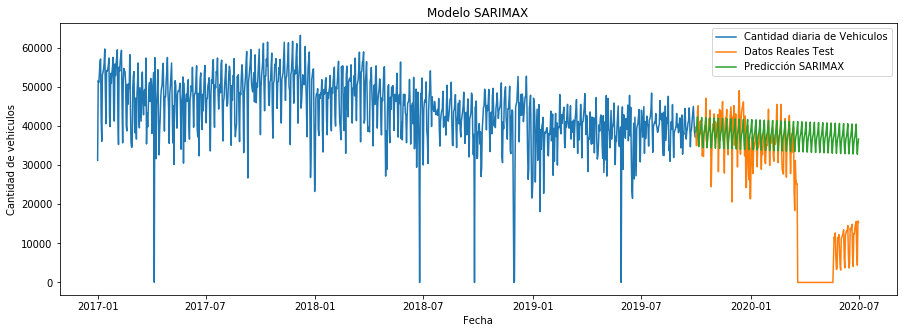

In [19]:
# Grafico de los datos reales y la predicción

plt.figure(figsize = (15,5))
plt.plot(train.index, train.cantidad_pasos, label = 'Cantidad diaria de Vehiculos')
plt.plot(test.index,  test.cantidad_pasos,  label = 'Datos Reales Test')
plt.plot(test.index,  prediccion, label = 'Predicción SARIMAX')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de vehiculos')
plt.legend()
plt.title("Modelo SARIMAX")
plt.show()

In [20]:
# Calculo de error del SARIMAX hasta el primer semestre de 2020

from sklearn.metrics import mean_squared_error
rmse_SARIMAX = np.sqrt(mean_squared_error(test.cantidad_pasos, prediccion))

print('RMSE modelo SARIMAX hasta Primer Semestre 2020: %.1f' % rmse_SARIMAX)

RMSE modelo SARIMAX hasta Primer Semestre 2020: 20739.0


Como se anticipó, el comportamiento completamente inusual de la pandemia es imposible de predecir. Se observa claramente en el gráfico, lo cual repercute fuertemente en el RMSE.

A continuación, solo se realizará la prueba de incorporar dos años más al conjunto de Train. No se esperan mejoras sustanciales ya que como vimos en el Análisis Exploratorio de Datos, hubo un cambio de tendencia en el 2018.

In [22]:
# Importo el dataset de 2016

data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')

data_2016.info()
data_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 non-null  int64 
 4   dia             1379443 non-null  object
 5   estacion        1379443 non-null  object
 6   sentido         1379443 non-null  object
 7   tipo_vehiculo   1379443 non-null  object
 8   forma_pago      1379443 non-null  object
 9   cantidad_pasos  1379443 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.2+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,NO COBRADO,32
1,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,AUPASS,9
2,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,NO COBRADO,1
3,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EFECTIVO,4
4,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EXENTO,3


In [23]:
# Importo el dataset de 2015

data_2015 = pd.read_csv('flujo-vehicular-2015.csv', sep =',')

data_2015.info()
data_2015.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017958 entries, 0 to 1017957
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1017958 non-null  int64 
 1   fecha           1017958 non-null  object
 2   hora            1017958 non-null  int64 
 3   dia             1017958 non-null  object
 4   estacion        1017958 non-null  object
 5   tipo_vehiculo   1017958 non-null  object
 6   forma_pago      1017958 non-null  object
 7   cantidad_pasos  1017958 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 62.1+ MB


,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos
0,2015,2015-01-01,0,Jueves,Alberdi,Liviano,NO COBRADO,15
1,2015,2015-01-01,0,Jueves,Alberdi,Liviano,EFECTIVO,1
2,2015,2015-01-01,0,Jueves,Alberdi,Liviano,EXENTO,1
3,2015,2015-01-01,0,Jueves,Alberdi,Liviano,EFECTIVO,68
4,2015,2015-01-01,0,Jueves,Alberdi,Liviano,AUPASS,18


In [24]:
# Chequeo que en ambos dataset aparezca la estación Illia y el pago por Efectivo

print(data_2016['estacion'].unique())
print(data_2016['forma_pago'].unique())

print(data_2015['estacion'].unique())
print(data_2015['forma_pago'].unique())

['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']
['Alberdi' 'Avellaneda' 'Dellepiane Liniers' 'Illia' 'Retiro' 'Sarmiento'
 'Dellepiane Centro' 'Salguero']
['NO COBRADO' 'EFECTIVO' 'EXENTO' 'AUPASS' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


In [27]:
# Concateno ambos dataset

data_15_16 = pd.concat([data_2015, data_2016])

# Filtro Illia y Efectivo
mask = np.logical_and(data_15_16.estacion=='Illia', data_15_16.forma_pago == 'EFECTIVO')
data_15_16 = data_15_16[mask]

# Resampleo los datos de manera diaria

data_15_16['fecha2'] = pd.to_datetime(data_15_16.fecha)
data_15_16.drop(columns = ['fecha'], inplace = True)
data_15_16.rename(columns = {'fecha2':'fecha'}, inplace = True) 

data_15_16 = data_15_16.resample('D', on = 'fecha').sum()

# Elimino las columnas que no sirven

data_15_16.drop(columns = ['periodo', 'hora', 'hora_inicio', 'hora_fin'], inplace = True)


data_15_16

,cantidad_pasos
fecha,
2015-01-01,25697
2015-01-02,38112
2015-01-03,27601
2015-01-04,33803
2015-01-05,48683
...,...
2016-12-27,59662
2016-12-28,60291
2016-12-29,61551


In [30]:
### Concateno el 2015 y 2016 con el dataset de los años 2017, 2018 y 2019

# Importo el dataset obtenido originalmente
dataset = pd.read_csv('dataset.csv', sep =',')

# Convierto nuevamente la columna fecha en formato dt
dataset['fecha2'] = pd.to_datetime(dataset.fecha)
dataset.drop(columns = ["Unnamed: 0",'fecha'], inplace = True)
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.rename(columns = {'dia':'dia_sem'}, inplace = True)

# Resampleo diario
diario = dataset.resample('D', on = 'fecha').sum()

# Concateno con 2015 y 2016
diario = pd.concat([diario, data_15_16])

# Reordeno por fecha
diario.sort_values('fecha', inplace = True)


diario

,cantidad_pasos
fecha,
2015-01-01,25697
2015-01-02,38112
2015-01-03,27601
2015-01-04,33803
2015-01-05,48683
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


C:\Users\Guillermo Mishima\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Guillermo Mishima\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


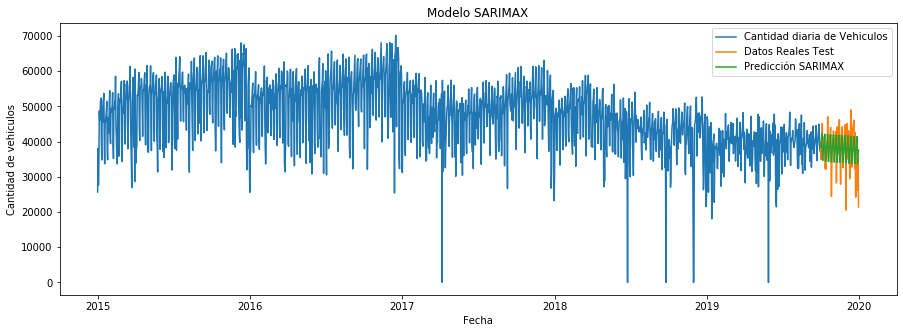

In [31]:
# Separo en Train y Test
diario['fecha_numeros'] = diario.index.map(datetime.datetime.toordinal)
split_date = '2019-09-30'
train = diario.loc[diario.index <= split_date].copy()
test  = diario.loc[diario.index >  split_date].copy()
train.drop(columns = ["fecha_numeros"], inplace = True)

# Genero el modelo con los parámetros optimizados anteriormente
import statsmodels.api as sm
modelo = sm.tsa.statespace.SARIMAX(train, order = (0,1,0), seasonal_order = (0,1,2,7))
modelo_sarimax = modelo.fit()

# Realizo la predicción hasta 31/12/2019
prediccion = modelo_sarimax.forecast(steps = (92))

# Grafico de los datos reales y la predicción

plt.figure(figsize = (15,5))
plt.plot(train.index, train.cantidad_pasos, label = 'Cantidad diaria de Vehiculos')
plt.plot(test.index,  test.cantidad_pasos,  label = 'Datos Reales Test')
plt.plot(test.index,  prediccion, label = 'Predicción SARIMAX')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de vehiculos')
plt.legend()
plt.title("Modelo SARIMAX")
plt.show()

In [32]:
# Calculo de error usando 2015 y 2016 en Train

from sklearn.metrics import mean_squared_error
rmse_SARIMAX = np.sqrt(mean_squared_error(test.cantidad_pasos, prediccion))

print('RMSE modelo SARIMAX incorporando 2015 y 2016 a Train: %.1f' % rmse_SARIMAX)

RMSE modelo SARIMAX incorporando 2015 y 2016 a Train: 5135.9


Como era de esperarse, la variación en el RMSE al incluir dos años más fue insignificante.

## 3. Investigación y Conclusiones

El modelo seleccionado (SARIMAX) tuvo una performance bastante pobre respecto al modelo Benchmark (Regresión Lineal). 

Es probable que el modelo no haya tenido una performance muy sobresaliente porque tiene 6 hiperparámetros, lo cual lo vuelve muy costoso de optimizar. En caso de intentar con otros umbrales de hiperparámetros más amplios, es esperable que consigamos un mejor RMSE.

Respondiendo a las preguntas propuestas por Acamica:

- ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?

Probaría utilizando otro modelo como Árbol de Decisión, ya que SARIMAX no incorpora estos atributos, solo fecha y cantidad de vehiculos. Se podría hacer un modelo SARIMAX con la combinación de cada valor posible de cada atributo y despues sumar cada proyección independiente, pero esto resulta altamente complejo, especialmente teniendo otros modelos que simplifican este trabajo. En el caso de utilizar un Árbol de Decisión con hiperparámetros optimizados, esperaría obtener un RMSE menor a los obtenidos en este proyecto.

- ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?

A continuación se analizará brevemente el comportamiento de las otras estaciones

In [52]:
# Importo nuevamente los dataset de los 3 años analizados inicialmente

data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

# Concateno los 3 datasets
dataset = pd.concat([data_2019, data_2018, data_2017])

# Paso la columna fecha a formato datetime 
dataset['fecha2'] = pd.to_datetime(dataset.fecha)

# Quito la columna de fecha original junto a los horarios y el año
dataset.drop(columns=['fecha', 'hora_fin', 'hora_inicio', 'periodo'], inplace = True)

# Corrigo el nombre de la columna con la fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 

# Reordeno el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)

dataset

,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Domingo,Illia,Provincia,Liviano,TELEPASE,368,2017-01-01
1,Domingo,Dellepiane Liniers,Provincia,Liviano,NO COBRADO,2,2017-01-01
2,Domingo,Dellepiane Liniers,Provincia,Liviano,EFECTIVO,19,2017-01-01
3,Domingo,Dellepiane Liniers,Provincia,Liviano,EXENTO,10,2017-01-01
4,Domingo,Dellepiane Liniers,Provincia,Liviano,EFECTIVO,786,2017-01-01
...,...,...,...,...,...,...,...
3560701,Martes,Avellaneda,Provincia,Liviano,EFECTIVO,647,2019-12-31
3560702,Martes,Avellaneda,Centro,Pesado,TELEPASE,157,2019-12-31
3560703,Martes,Avellaneda,Centro,Pesado,NO COBRADO,1,2019-12-31
3560704,Martes,Avellaneda,Centro,Pesado,EXENTO,10,2019-12-31


In [53]:
# Agrupo por estación
dataset_agrupado = dataset.groupby(["fecha","estacion"])[("cantidad_pasos")].sum().reset_index(name="cantidad_pasos")

# Chequeo los nombres de las estaciones para unificar
print(dataset_agrupado['estacion'].unique())

['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento' 'Alberti' 'Dellepiane' 'PDB']


In [54]:
# Unifico los nombres de las estaciones
dataset_agrupado = dataset_agrupado.replace({'Dellepiane Centro':'Dellepiane', 'Dellepiane Liniers':'Dellepiane', 'Alberti':'Alberdi'})

# Chequeo los nombres de las estaciones
print(dataset_agrupado['estacion'].unique())

['Alberdi' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']


Text(0.5, 1.0, 'Cantidad de vehiculos por Trimestre por Estación')

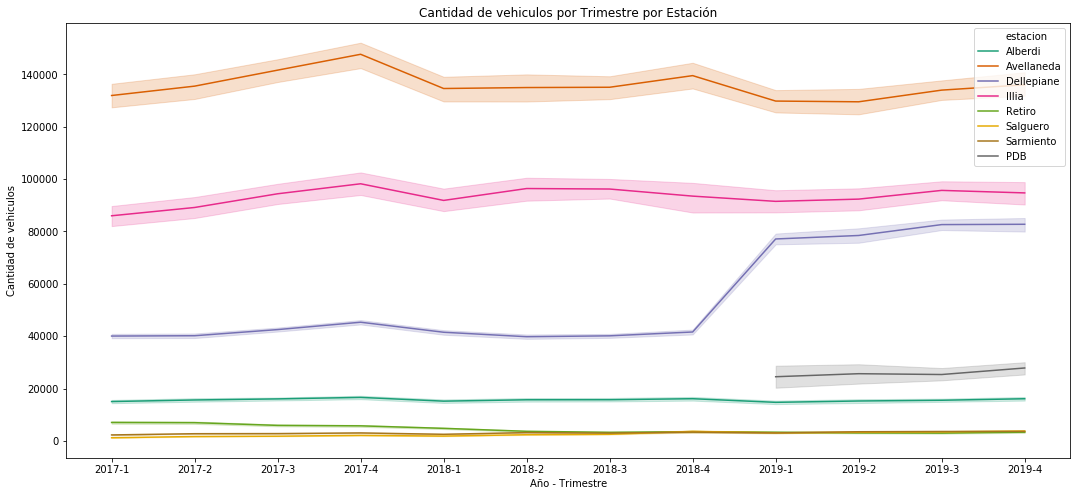

In [55]:
dataset_agrupado["año"] = dataset_agrupado["fecha"].dt.year
dataset_agrupado["Q"]   = dataset_agrupado["fecha"].dt.quarter

dataset_agrupado["año-Q"] = dataset_agrupado["año"].map(str) + "-" + dataset_agrupado["Q"].map(str)

plt.figure(figsize = (18,8))

sns.lineplot(data = dataset_agrupado, x = "año-Q", y = "cantidad_pasos", hue = "estacion", palette = "Dark2")
plt.xlabel("Año - Trimestre")
plt.ylabel("Cantidad de vehiculos")
plt.title("Cantidad de vehiculos por Trimestre por Estación")

No se observan tendencias muy claras en el gráfico presentado arriba. Sin embargo, se puede concluir que:

- El peaje más importante es Avellaneda, con lo cual es más fácil de determinar de manera gráfica una tendencia negativa. Este peaje se encuentra en el sur de CABA donde, en promedio, el poder adquisitivo de la población no es tan alto como en el norte. La hipotesis de que una situación económica desfavorable impacta en el tránsito es compatible con lo observado.
- El segundo peaje más importante es Illia, ya se analizó a lo largo del proyecto.
- El tercero es Dellepiane. Se ve un crecimiento abrupto en 2019, pero lo más probable es que se deba a una apertura de un segundo peaje (previamente se unificó Dellepiane Centro y Dellepiane Liniers en un solo Dellepiane, asumiendo que era la misma estación).

Por último, se graficará el total de las estaciones por año para ver su comportamiento

Text(0.5, 1.0, 'Cantidad de vehiculos por Año')

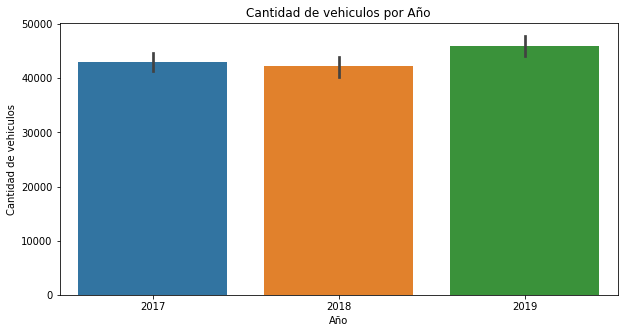

In [65]:
plt.figure(figsize = (10,5))

sns.barplot(data = dataset_agrupado, x = "año", y = "cantidad_pasos")
plt.xlabel("Año")
plt.ylabel("Cantidad de vehiculos")
plt.title("Cantidad de vehiculos por Año")

Este gráfico nos revela que no hubo una caída en la cantidad de vehiculos circulando, sino que hubo una pequeña caída en 2018 y un aumento en 2019.

Esto quiere decir que, si bien hubo algunos peajes que perdieron tráfico, otros lo ganaron. Las causas de este comportamiento pueden ser varias, desde remodelaciones en algunas calles hasta protestas que dificultan la circulación, no necesariamente jugando un papel decisivo la parte económica.

- ¿Hay algo que te gustaría investigar o probar?

Particularmente me gustaría probar un Árbol de Decisión, ya que si bien no se trata de un modelo propio de Series de Tiempo, incorpora toda la información disponible. 
Otra mejora posible que no se intentó es enriquecer el dataset con otros datos, como por ejemplo, el precio del combustible. Sin embargo, con la inflación de Argentina sería complejo convertir el valor del combustible en algo representativo, ya que tambien tendriamos que tener otras variables económicas como el sueldo promedio o el poder adquisitivo de la población.

### Link al repositorio en Github

https://github.com/gmishima/Acamica-Proyecto-3